In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("..")

In [3]:
import colonist_ql.interface_interaction.feature_extration as fe
import colonist_ql.interface_interaction.game_image_extraction as ie
import colonist_ql.game_structure.visualise as visualise

image = ie.game_image()

In [4]:
fe.PORT_IMAGE_DIR = "../game_images/icons"
hexes = fe.initial_board_extraction(image)
print(len(hexes))

C:\Users\Zac\Documents\GitHub\ColonistQLearning\colonist_ql\interface_interaction\feature_extration.py:196: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  results[t] = measure.compare_ssim(image, test_image, multichannel=True)


37


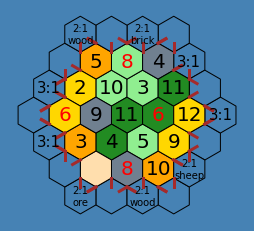

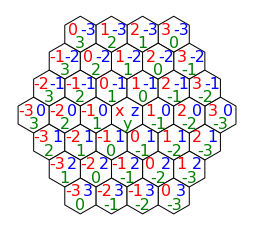

In [12]:
visualise.draw_board(hexes)
visualise.draw_coords(hexes)

In [5]:
from colonist_ql.game_structure.board import Board
import colonist_ql.game_structure.structures as structures

for h in hexes:
    structures.Hexes().add(h)


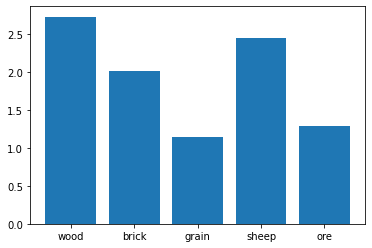

In [6]:
import colonist_ql.analytics.visualise as av
import colonist_ql.analytics.analytics as analytics

av.plot_maximum_expected_resources()
